# WeatherPy


In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
query_url ="https://api.citygridmedia.com/content/reviews/v2/search/latlon?lat=34.10652&lon=-118.411509&radius=10&what=sushi&publisher=10000027978&format=json"
 
response = requests.get(query_url).json()

response
# data=response.json()
# pprint(response)

# query_url
# xmltodict. parse()


{'results': {'query_id': None,
  'uri': 'http://api.citygridmedia.com/reviews/reviews/v2/search/latlon?format=json&page=1&rpp=20&what=sushi&radius=10&histograms=false&publisher=10000027978&lat=34.10652&lon=-118.411509&region_type=circle',
  'first_hit': 1,
  'last_hit': 20,
  'total_hits': 668,
  'page': 1,
  'rpp': 20,
  'did_you_mean': None,
  'regions': [],
  'histograms': [],
  'reviews': [{'review_id': 'ip_10300281341',
    'review_title': 'Sushi Dan',
    'review_text': 'Sushi Dan has a nice atmosphere, good date spot, large patio.  The sushi is pretty good.  The lunch special for $9.95 gets you 5 pieces of sushi plus a roll of your choice so pretty large portions.  Miso soup was excellent.  I definitely…',
    'pros': None,
    'cons': None,
    'review_rating': 8,
    'review_date': '2008-02-26T17:02:00Z',
    'review_author': 'Katherine M',
    'helpful_count': None,
    'unhelpful_count': None,
    'type': 'user_review',
    'source': 'INSIDERPAGES',
    'reference_id': None,

In [20]:
response

{'results': {'query_id': None,
  'uri': 'http://api.citygridmedia.com/reviews/reviews/v2/search/latlon?format=json&page=1&rpp=20&what=sushi&radius=10&histograms=false&publisher=10000027978&lat=34.10652&lon=-118.411509&region_type=circle',
  'first_hit': 1,
  'last_hit': 20,
  'total_hits': 668,
  'page': 1,
  'rpp': 20,
  'did_you_mean': None,
  'regions': [],
  'histograms': [],
  'reviews': [{'review_id': 'ip_10300281341',
    'review_title': 'Sushi Dan',
    'review_text': 'Sushi Dan has a nice atmosphere, good date spot, large patio.  The sushi is pretty good.  The lunch special for $9.95 gets you 5 pieces of sushi plus a roll of your choice so pretty large portions.  Miso soup was excellent.  I definitely…',
    'pros': None,
    'cons': None,
    'review_rating': 8,
    'review_date': '2008-02-26T17:02:00Z',
    'review_author': 'Katherine M',
    'helpful_count': None,
    'unhelpful_count': None,
    'type': 'user_review',
    'source': 'INSIDERPAGES',
    'reference_id': None,

In [8]:
for index, row in cities_df.iterrows():
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
 
    city=row["City"]
   
      # make request
    response = requests.get(query_url + city).json()
    
    try:           
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]= response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        print(f'Processing Record {index} of Set 1 | {city}')
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
# Visualize to confirm lat lng appear
cities_df.head()

Processing Record 0 of Set 1 | hithadhoo
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | atuona
Missing field/result... skipping.
Processing Record 5 of Set 1 | snasa
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | clonakilty
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | uhlove
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | tiarei
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | busselton
Processing Record

Processing Record 198 of Set 1 | asau
Processing Record 199 of Set 1 | vila velha
Processing Record 200 of Set 1 | le mars
Processing Record 201 of Set 1 | nikolskoye
Processing Record 202 of Set 1 | san patricio
Processing Record 203 of Set 1 | dingle
Processing Record 204 of Set 1 | gulf gate estates
Processing Record 205 of Set 1 | katangli
Processing Record 206 of Set 1 | windhoek
Processing Record 207 of Set 1 | san cristobal
Processing Record 208 of Set 1 | myaundzha
Processing Record 209 of Set 1 | ottawa
Missing field/result... skipping.
Processing Record 211 of Set 1 | college
Processing Record 212 of Set 1 | lasa
Processing Record 213 of Set 1 | east london
Processing Record 214 of Set 1 | norilsk
Processing Record 215 of Set 1 | aripuana
Processing Record 216 of Set 1 | grindavik
Processing Record 217 of Set 1 | kirovskiy
Processing Record 218 of Set 1 | lafia
Processing Record 219 of Set 1 | caravelas
Processing Record 220 of Set 1 | sabha
Processing Record 221 of Set 1 | s

Processing Record 398 of Set 1 | kankon
Processing Record 399 of Set 1 | madang
Processing Record 400 of Set 1 | prince rupert
Processing Record 401 of Set 1 | boa vista
Processing Record 402 of Set 1 | palmer
Processing Record 403 of Set 1 | labytnangi
Processing Record 404 of Set 1 | thinadhoo
Processing Record 405 of Set 1 | kahului
Processing Record 406 of Set 1 | casper
Processing Record 407 of Set 1 | mundo nuevo
Processing Record 408 of Set 1 | sterling
Processing Record 409 of Set 1 | vieques
Processing Record 410 of Set 1 | sola
Processing Record 411 of Set 1 | wembley
Processing Record 412 of Set 1 | havre-saint-pierre
Processing Record 413 of Set 1 | pacific grove
Processing Record 414 of Set 1 | kenai
Processing Record 415 of Set 1 | santa clara
Processing Record 416 of Set 1 | black river
Processing Record 417 of Set 1 | cairns
Processing Record 418 of Set 1 | plettenberg bay
Processing Record 419 of Set 1 | methoni
Processing Record 420 of Set 1 | kargasok
Missing field/r

Processing Record 597 of Set 1 | mersing
Processing Record 598 of Set 1 | safaga
Processing Record 599 of Set 1 | khandyga
Processing Record 600 of Set 1 | qena
Processing Record 601 of Set 1 | necochea
Processing Record 602 of Set 1 | keti bandar
Processing Record 603 of Set 1 | omboue
Processing Record 604 of Set 1 | iquitos
Processing Record 605 of Set 1 | teguldet


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6,73.0833,82.18,69,100,5.1,MV,1611433403
1,severo-kurilsk,50.6789,156.125,22.26,95,88,34.27,RU,1611433404
2,puerto ayora,-0.7393,-90.3518,82.4,74,40,11.5,EC,1611433290
3,atuona,-9.8,-139.033,78.12,79,2,18.39,PF,1611433404
4,taolanaro,,,,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df.to_csv("City_data.csv")
cities_df.head(5)
# cities_df.to_numeric("Lat")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6,73.0833,82.18,69,100,5.1,MV,1611433403
1,severo-kurilsk,50.6789,156.125,22.26,95,88,34.27,RU,1611433404
2,puerto ayora,-0.7393,-90.3518,82.4,74,40,11.5,EC,1611433290
3,atuona,-9.8,-139.033,78.12,79,2,18.39,PF,1611433404
4,taolanaro,,,,,,,,


In [11]:
# df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')
cities_df['Lat']=pd.to_numeric(cities_df['Lat'],errors='coerce')
cities_df['Lng']=pd.to_numeric(cities_df['Lng'],errors='coerce')
cities_df['Max Temp']=pd.to_numeric(cities_df['Max Temp'],errors='coerce')
cities_df['Humidity']=pd.to_numeric(cities_df['Humidity'],errors='coerce')
cities_df['Cloudiness']=pd.to_numeric(cities_df['Cloudiness'],errors='coerce')
cities_df['Wind Speed']=pd.to_numeric(cities_df['Wind Speed'],errors='coerce')
cities_df['Date']=pd.to_numeric(cities_df['Date'],errors='coerce')
# cities_df.dtypes

In [12]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.588102,17.619595,50.279171,71.517117,54.841441,8.223099,1.611433e+09
std,33.215788,90.080984,32.586628,20.799828,40.100462,5.767456,5.670150e+01
min,-54.800000,-175.200000,-49.410000,7.000000,0.000000,0.540000,1.611433e+09
25%,-5.512450,-63.846400,30.990000,63.500000,9.500000,4.260000,1.611433e+09
50%,26.124700,22.391600,61.720000,77.000000,72.000000,6.850000,1.611433e+09
75%,48.061150,94.108350,77.000000,87.000000,94.000000,11.140000,1.611433e+09
max,78.218600,179.316700,104.020000,100.000000,100.000000,34.270000,1.611433e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
index_names = cities_df[(cities_df['Humidity'] > 100)].index
index_names

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_clean=cities_df.drop(index_names, inplace = False)
cities_clean.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.588102,17.619595,50.279171,71.517117,54.841441,8.223099,1.611433e+09
std,33.215788,90.080984,32.586628,20.799828,40.100462,5.767456,5.670150e+01
min,-54.800000,-175.200000,-49.410000,7.000000,0.000000,0.540000,1.611433e+09
25%,-5.512450,-63.846400,30.990000,63.500000,9.500000,4.260000,1.611433e+09
50%,26.124700,22.391600,61.720000,77.000000,72.000000,6.850000,1.611433e+09
75%,48.061150,94.108350,77.000000,87.000000,94.000000,11.140000,1.611433e+09
max,78.218600,179.316700,104.020000,100.000000,100.000000,34.270000,1.611433e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

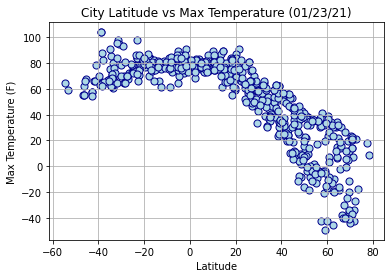

In [15]:
chart1 = cities_clean.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='LightBlue',edgecolors='DarkBlue', s=50)

plt.title("City Latitude vs Max Temperature (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Figure 1.png')

## Latitude vs. Humidity Plot

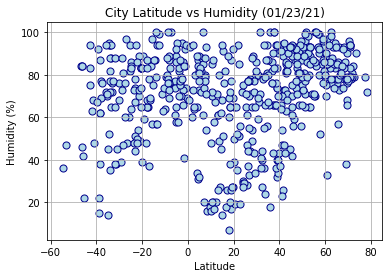

In [16]:
chart2 = cities_clean.plot.scatter(x='Lat',
                      y='Humidity',
                      c='LightBlue',edgecolors='DarkBlue', s=50)

plt.title("City Latitude vs Humidity (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('Figure 2.png')

## Latitude vs. Cloudiness Plot

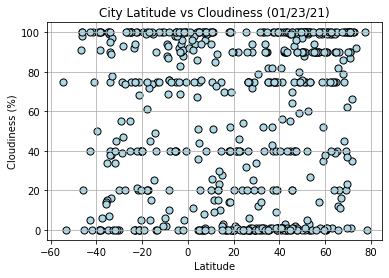

In [17]:
chart3 = cities_clean.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='LightBlue',edgecolors='black', s=50)

plt.title("City Latitude vs Cloudiness (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('Figure 3.png')

## Latitude vs. Wind Speed Plot

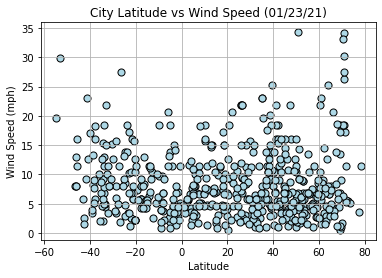

In [18]:
chart4 = cities_clean.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='LightBlue',edgecolors='black', s=50)

plt.title("City Latitude vs Wind Speed (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('Figure 4.png')

## Linear Regression

In [19]:
NorthData = cities_clean[cities_clean['Lat'] > 0] 
SouthData = cities_clean[cities_clean['Lat'] < 0] 
# Equator=cities_clean[cities_clean['Lat'] == 0] 
# Equator

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7342235886433695


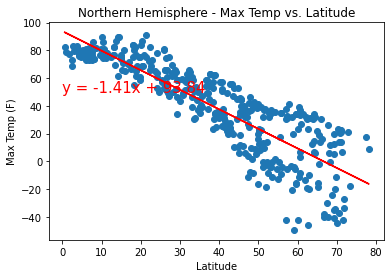

In [20]:
x_values = NorthData['Lat']
y_values = NorthData['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.16345683852714873


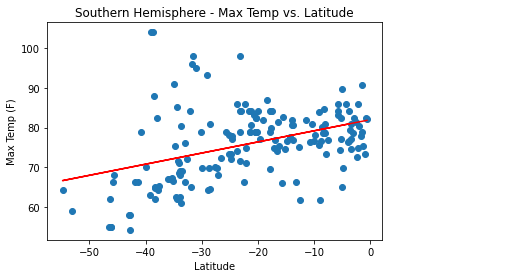

In [21]:
x_values = SouthData['Lat']
y_values = SouthData['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1679459158905891


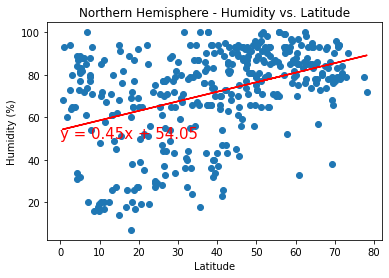

In [22]:
x_values = NorthData['Lat']
y_values = NorthData['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08928427826180799


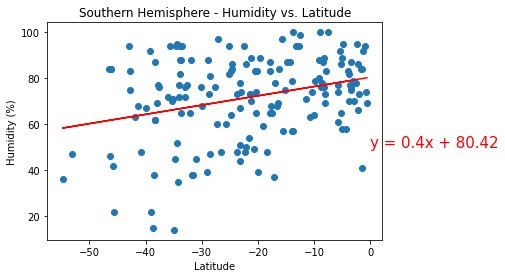

In [23]:
x_values = SouthData['Lat']
y_values = SouthData['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04077442560431481


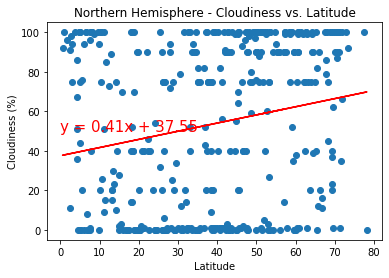

In [24]:
x_values = NorthData['Lat']
y_values = NorthData['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03284711937349216


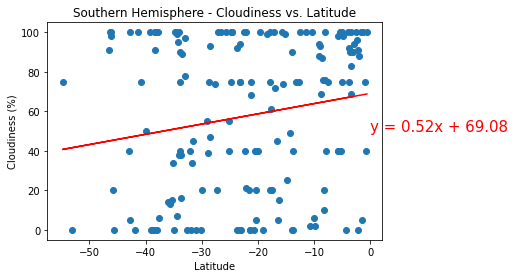

In [25]:
x_values = SouthData['Lat']
y_values = SouthData['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006495584877112865


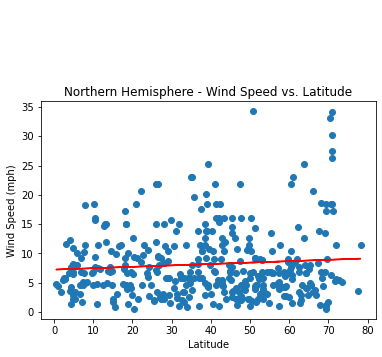

In [26]:
x_values = NorthData['Lat']
y_values = NorthData['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08913305340783217


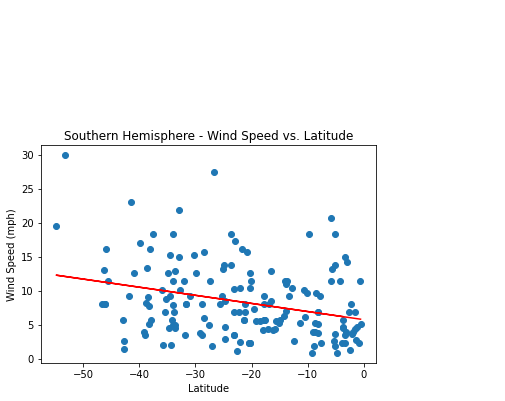

In [27]:
x_values = SouthData['Lat']
y_values = SouthData['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()